# EDA 

In [176]:
import numpy as np
import pandas as pd 
import itertools

# import phik
import scipy.stats as stats

# from phik import resources
# from phik.binning import bin_data
# from phik.report import plot_correlation_matrix

fraud_data = pd.read_csv("/Users/michaelhirschberger/Documents/Vehicle Insurance Claim Fraud Detection/fraud_oracle.csv")

In [177]:
fraud_data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [178]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [179]:
fraud_data['DayOfWeekClaimed'].value_counts()

DayOfWeekClaimed
Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday      127
Sunday         52
0               1
Name: count, dtype: int64

In [180]:
fraud_data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [181]:
fraud_data.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [182]:
fraud_data.isnull().mean() * 100

Month                   0.0
WeekOfMonth             0.0
DayOfWeek               0.0
Make                    0.0
AccidentArea            0.0
DayOfWeekClaimed        0.0
MonthClaimed            0.0
WeekOfMonthClaimed      0.0
Sex                     0.0
MaritalStatus           0.0
Age                     0.0
Fault                   0.0
PolicyType              0.0
VehicleCategory         0.0
VehiclePrice            0.0
FraudFound_P            0.0
PolicyNumber            0.0
RepNumber               0.0
Deductible              0.0
DriverRating            0.0
Days_Policy_Accident    0.0
Days_Policy_Claim       0.0
PastNumberOfClaims      0.0
AgeOfVehicle            0.0
AgeOfPolicyHolder       0.0
PoliceReportFiled       0.0
WitnessPresent          0.0
AgentType               0.0
NumberOfSuppliments     0.0
AddressChange_Claim     0.0
NumberOfCars            0.0
Year                    0.0
BasePolicy              0.0
dtype: float64

In [183]:
fraud_data_cleaned = fraud_data[(fraud_data['Age'] >= 16) & (fraud_data['DayOfWeekClaimed'] != '0')]
fraud_data_cleaned['Date'] = pd.to_datetime(fraud_data_cleaned['Month'] + ' ' + fraud_data_cleaned['Year'].apply(str))

/var/folders/n4/l157spx926v02fvwd34yfcc80000gn/T/ipykernel_37382/3638797489.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fraud_data_cleaned['Date'] = pd.to_datetime(fraud_data_cleaned['Month'] + ' ' + fraud_data_cleaned['Year'].apply(str))
/var/folders/n4/l157spx926v02fvwd34yfcc80000gn/T/ipykernel_37382/3638797489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_data_cleaned['Date'] = pd.to_datetime(fraud_data_cleaned['Month'] + ' ' + fraud_data_cleaned['Year'].apply(str))


In [184]:
fraud_data_cleaned['DayOfWeekClaimed'].value_counts()

DayOfWeekClaimed
Monday       3684
Tuesday      3297
Wednesday    2890
Thursday     2616
Friday       2434
Saturday      127
Sunday         52
Name: count, dtype: int64

In [185]:
fraud_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15100 entries, 0 to 15419
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Month                 15100 non-null  object        
 1   WeekOfMonth           15100 non-null  int64         
 2   DayOfWeek             15100 non-null  object        
 3   Make                  15100 non-null  object        
 4   AccidentArea          15100 non-null  object        
 5   DayOfWeekClaimed      15100 non-null  object        
 6   MonthClaimed          15100 non-null  object        
 7   WeekOfMonthClaimed    15100 non-null  int64         
 8   Sex                   15100 non-null  object        
 9   MaritalStatus         15100 non-null  object        
 10  Age                   15100 non-null  int64         
 11  Fault                 15100 non-null  object        
 12  PolicyType            15100 non-null  object        
 13  VehicleCategory      

In [186]:
%%time
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

CPU times: user 239 µs, sys: 679 µs, total: 918 µs
Wall time: 921 µs


In [187]:
fraud_data_cleaned['FraudFound_P'].value_counts()

FraudFound_P
0    14208
1      892
Name: count, dtype: int64

In [188]:
fraud_data_cleaned['FraudFound_P'].value_counts(normalize=True)

FraudFound_P
0    0.940927
1    0.059073
Name: proportion, dtype: float64

In [189]:
fraudulent_claims = fraud_data_cleaned[fraud_data_cleaned['FraudFound_P'] == 1]

In [190]:
fraudulent_claims.shape

(892, 34)

<Axes: xlabel='AccidentArea', ylabel='count'>

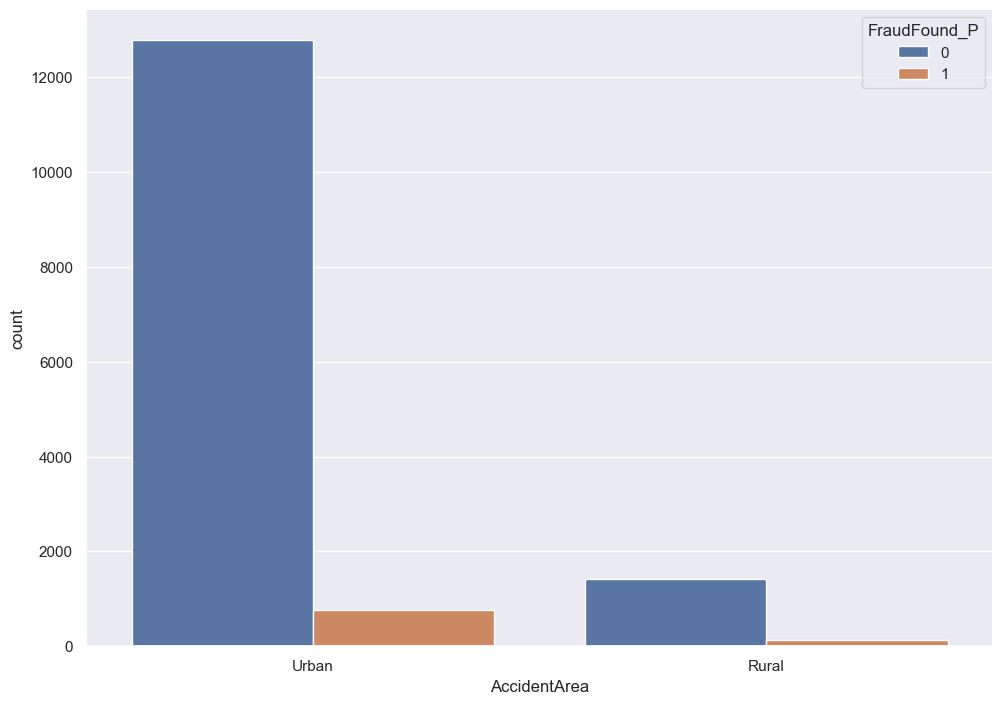

In [191]:
sns.countplot(data=fraud_data_cleaned, x='AccidentArea', hue='FraudFound_P')

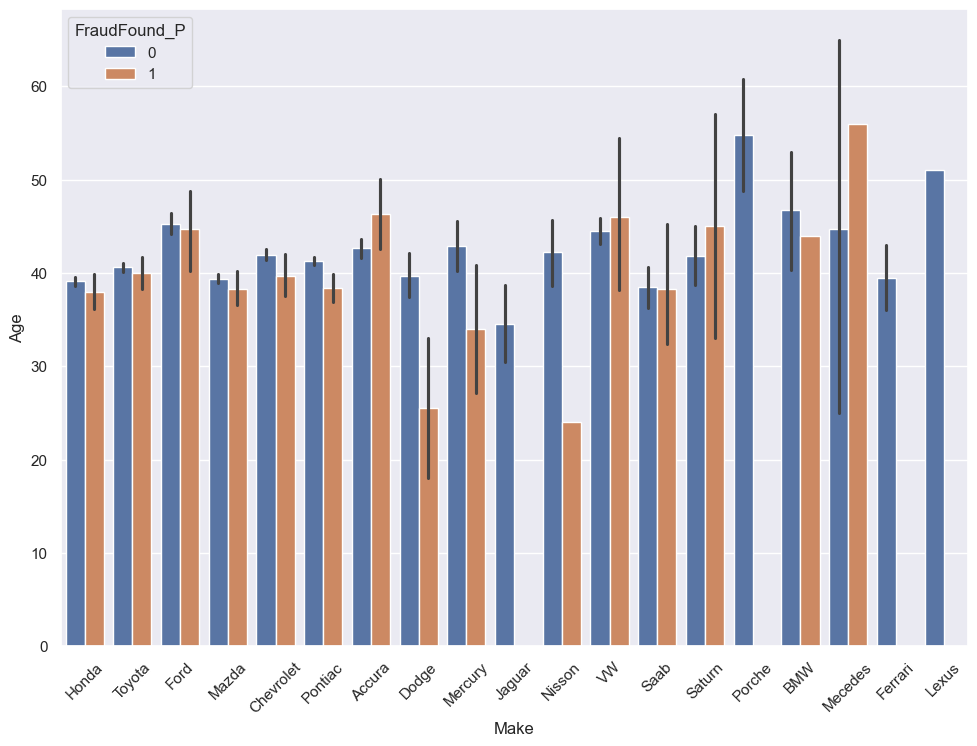

In [192]:
make_age = sns.barplot(data=fraud_data_cleaned, x="Make", y="Age", hue="FraudFound_P")
make_age.tick_params(axis='x', labelrotation=45)

In [193]:
fraud_data_cleaned.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'Date'],
      dtype='object')

In [194]:
fraud_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15100 entries, 0 to 15419
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Month                 15100 non-null  object        
 1   WeekOfMonth           15100 non-null  int64         
 2   DayOfWeek             15100 non-null  object        
 3   Make                  15100 non-null  object        
 4   AccidentArea          15100 non-null  object        
 5   DayOfWeekClaimed      15100 non-null  object        
 6   MonthClaimed          15100 non-null  object        
 7   WeekOfMonthClaimed    15100 non-null  int64         
 8   Sex                   15100 non-null  object        
 9   MaritalStatus         15100 non-null  object        
 10  Age                   15100 non-null  int64         
 11  Fault                 15100 non-null  object        
 12  PolicyType            15100 non-null  object        
 13  VehicleCategory      

In [195]:
categorical = [
"MonthClaimed",
"Fault",
"PolicyType",
"VehicleCategory",
#"VehiclePrice",
"Days_Policy_Accident",
"Days_Policy_Claim",
"AgeOfVehicle",
"AgeOfPolicyHolder",
"PoliceReportFiled",
"WitnessPresent",
"AgentType",
"NumberOfSuppliments",
"AddressChange_Claim",
"NumberOfCars",
"BasePolicy"]

numerical = ["WeekOfMonth",
"WeekOfMonthClaimed",
"VehiclePrice",
"Deductible",
"DriverRating"]

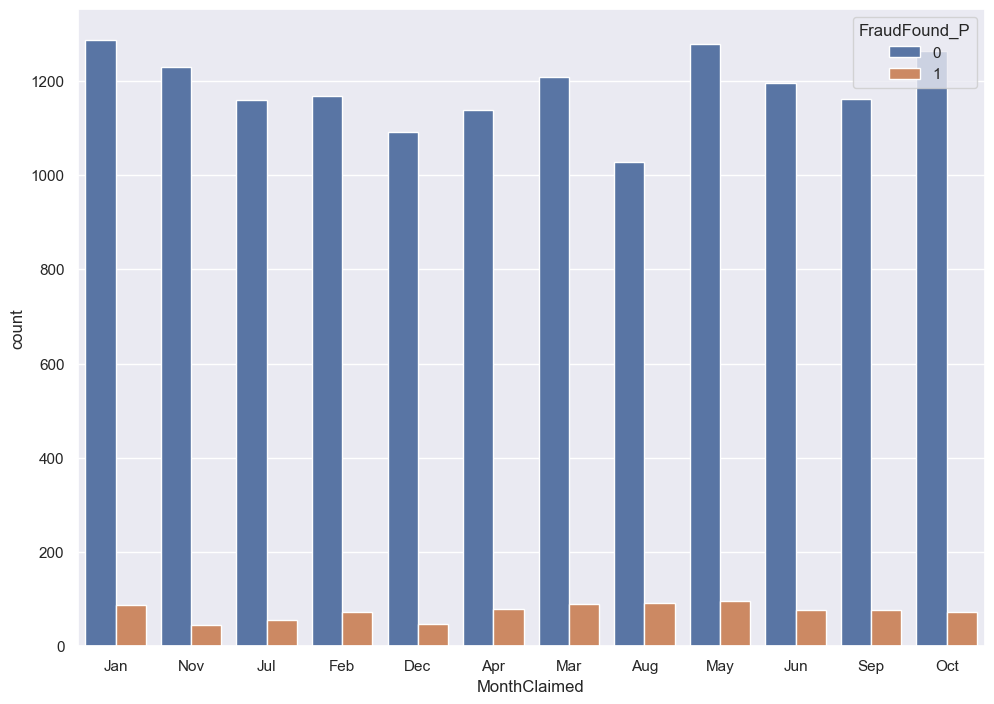

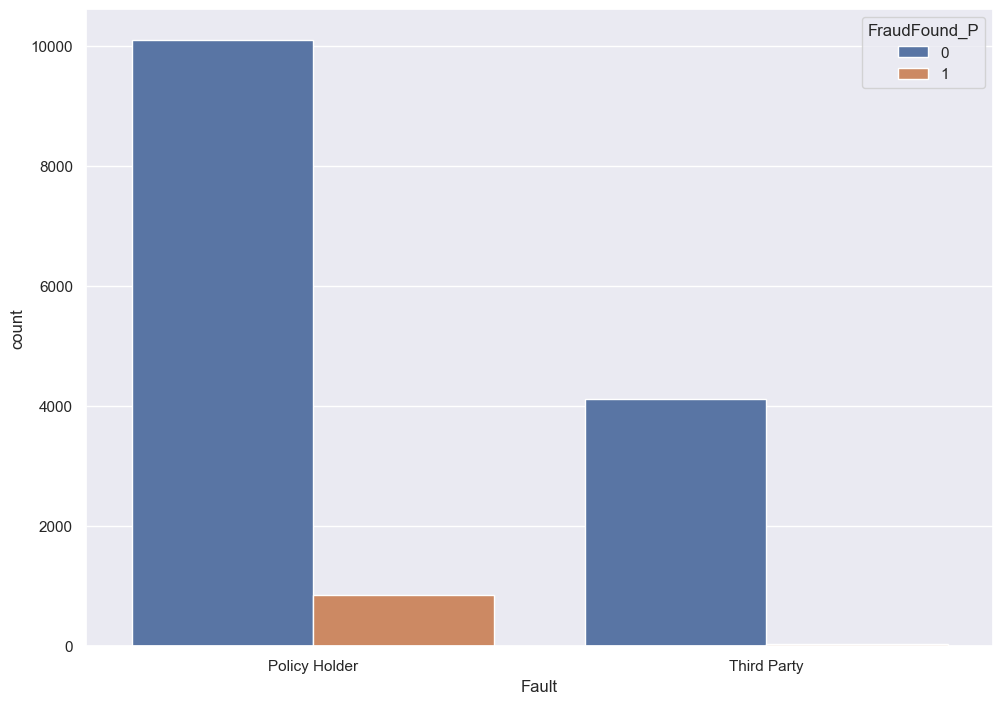

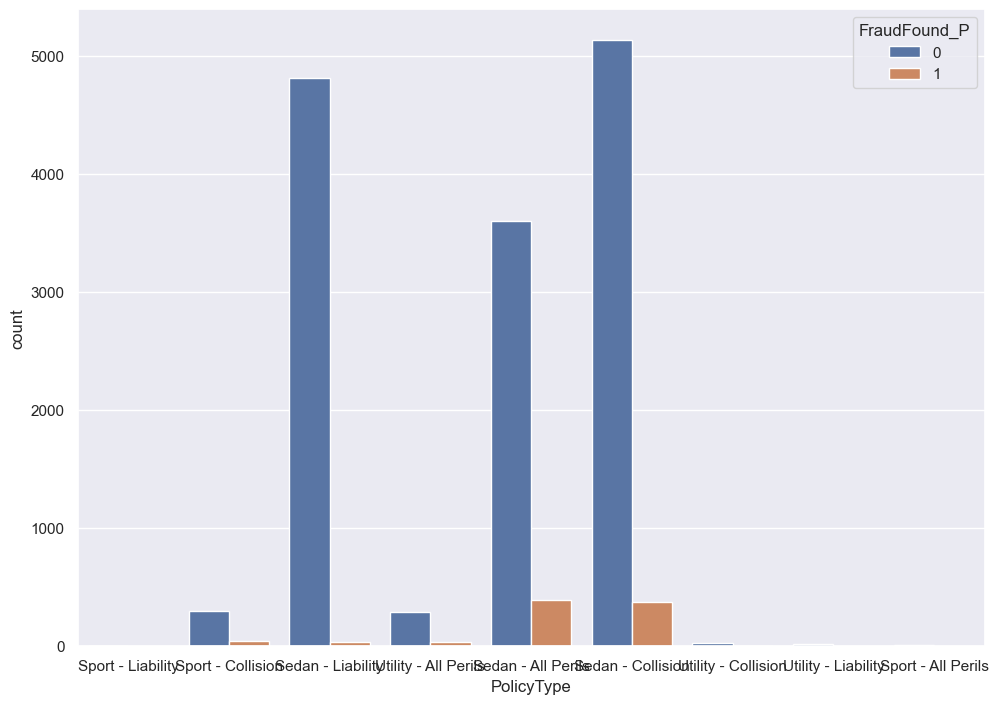

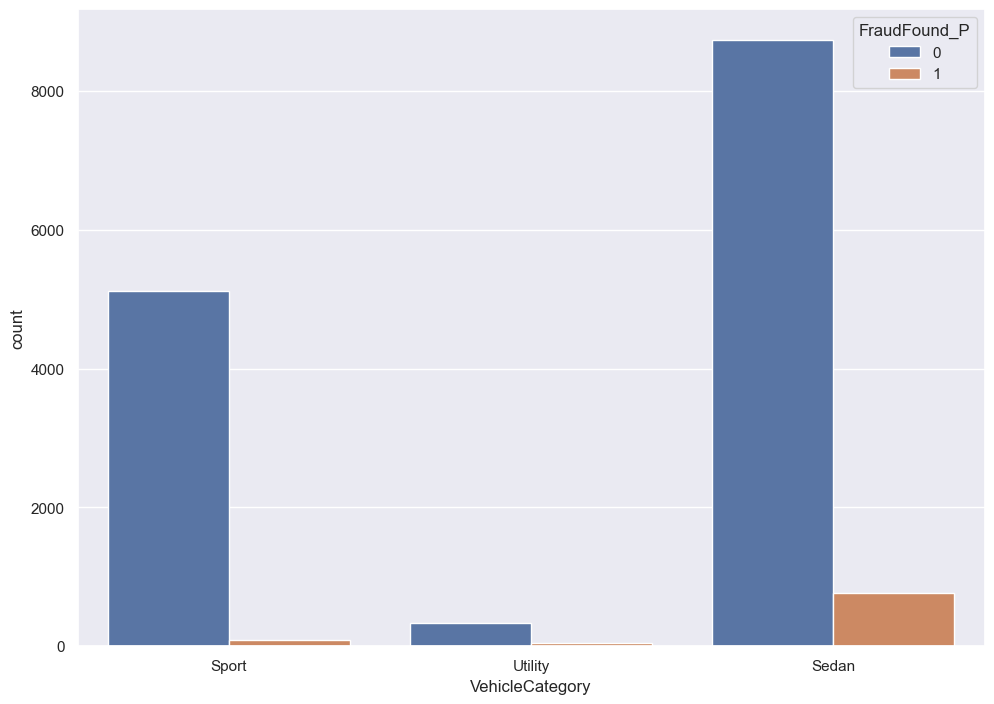

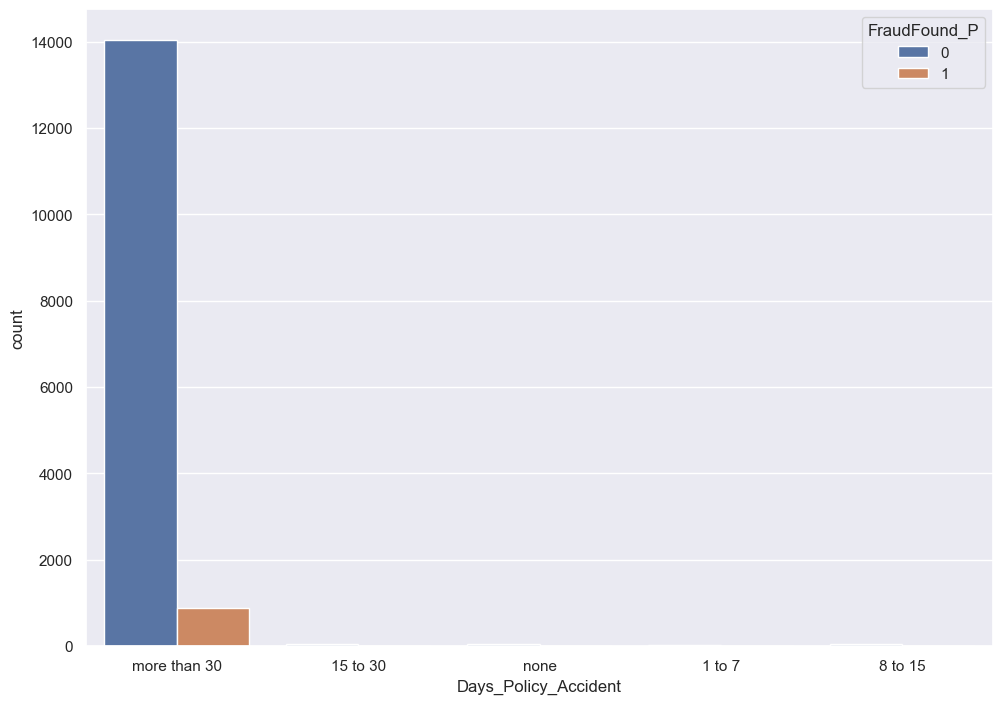

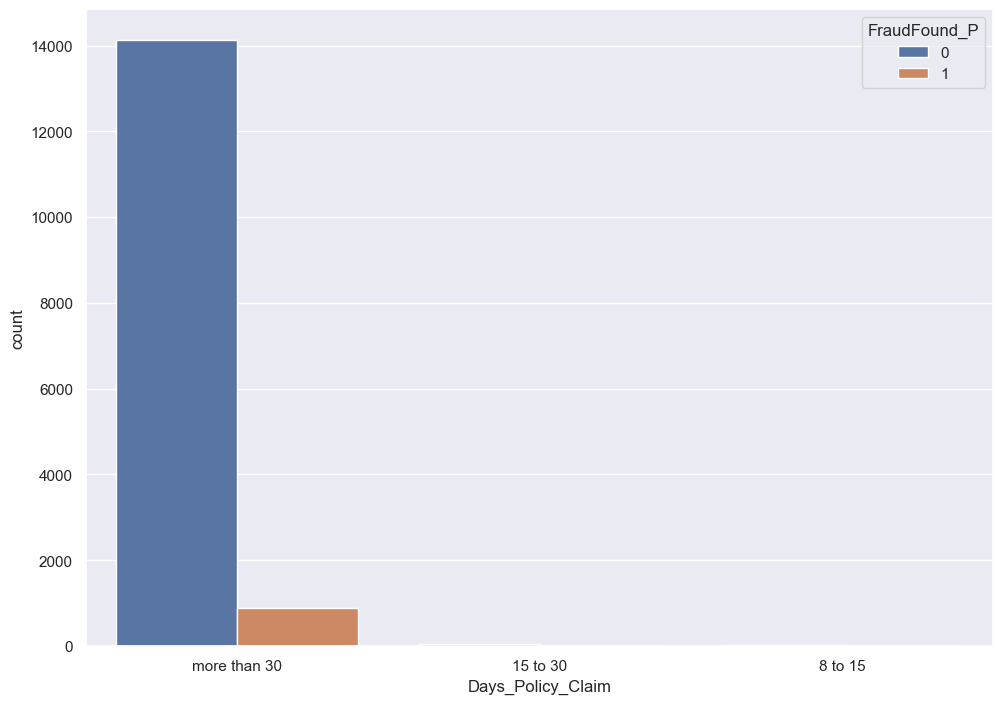

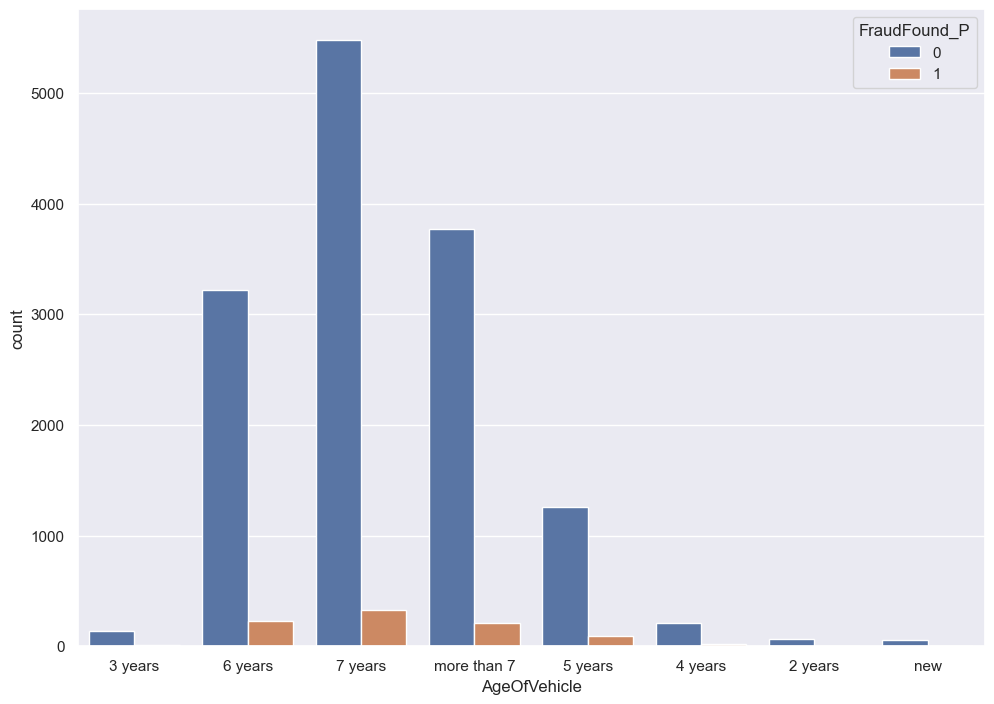

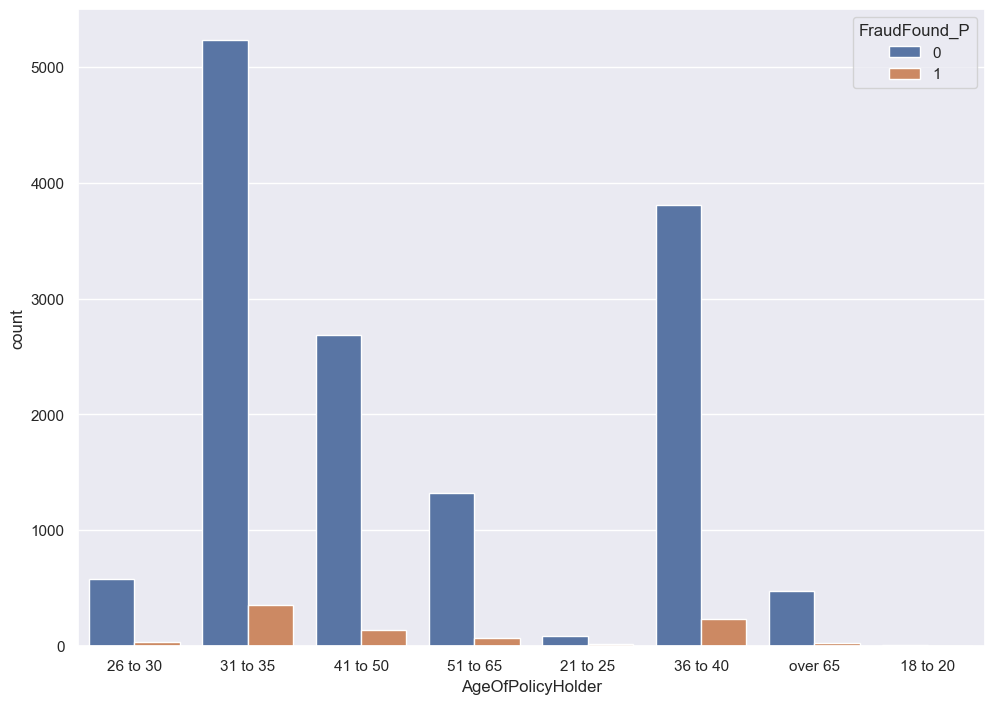

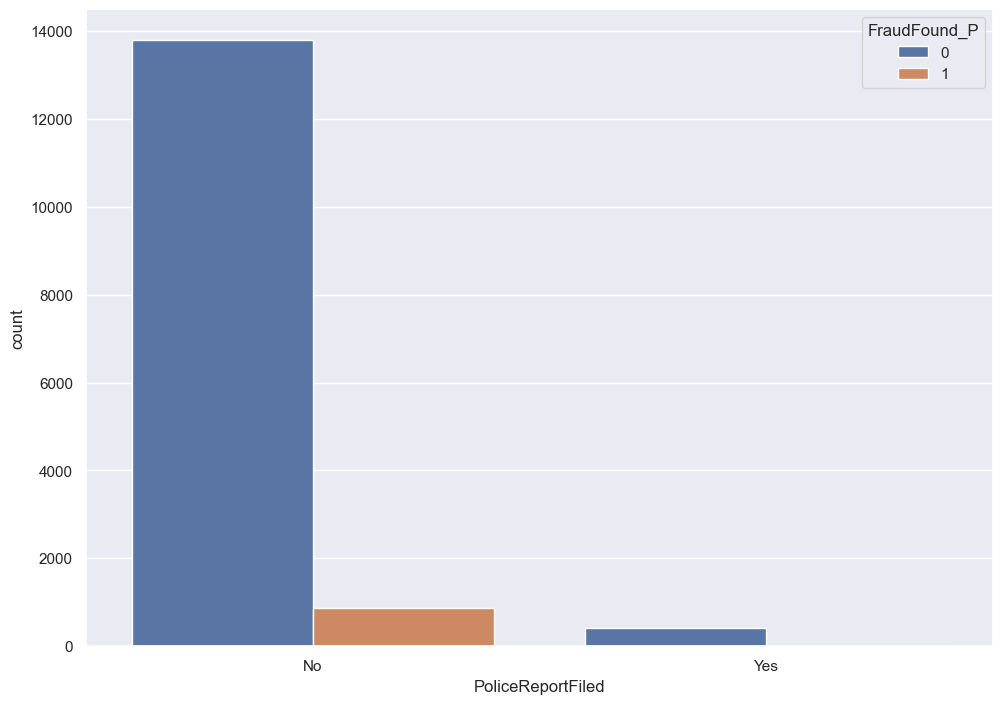

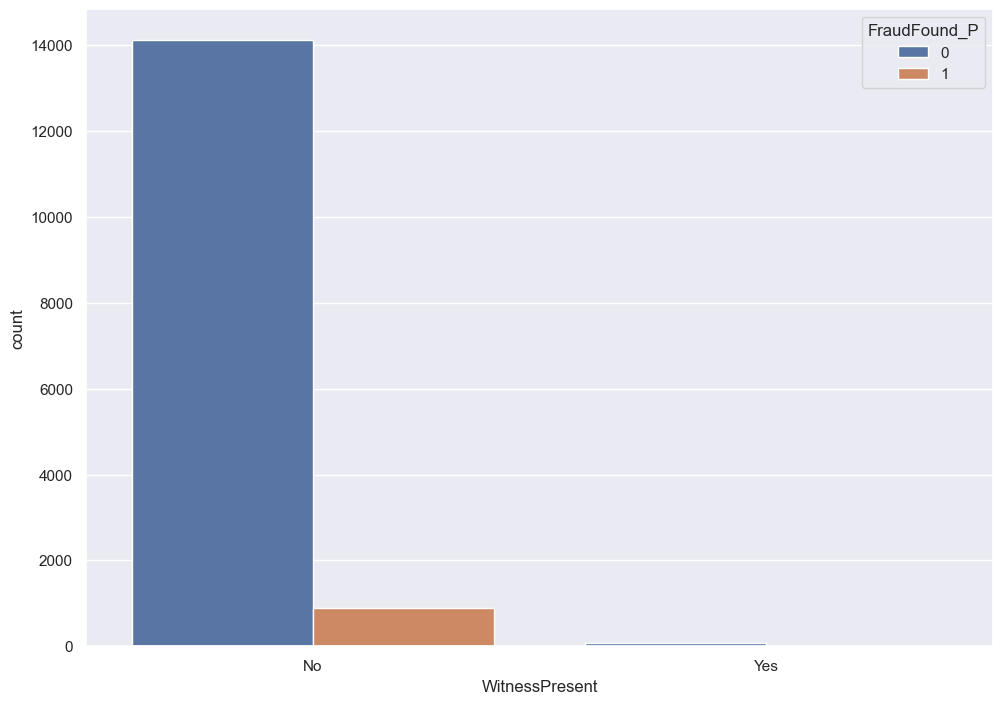

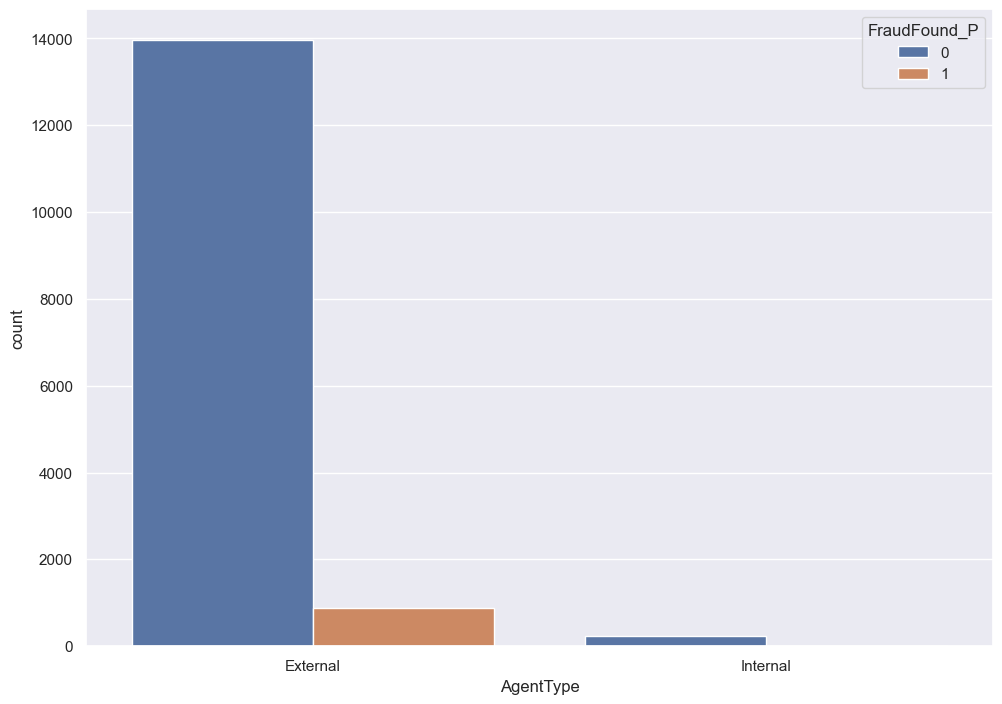

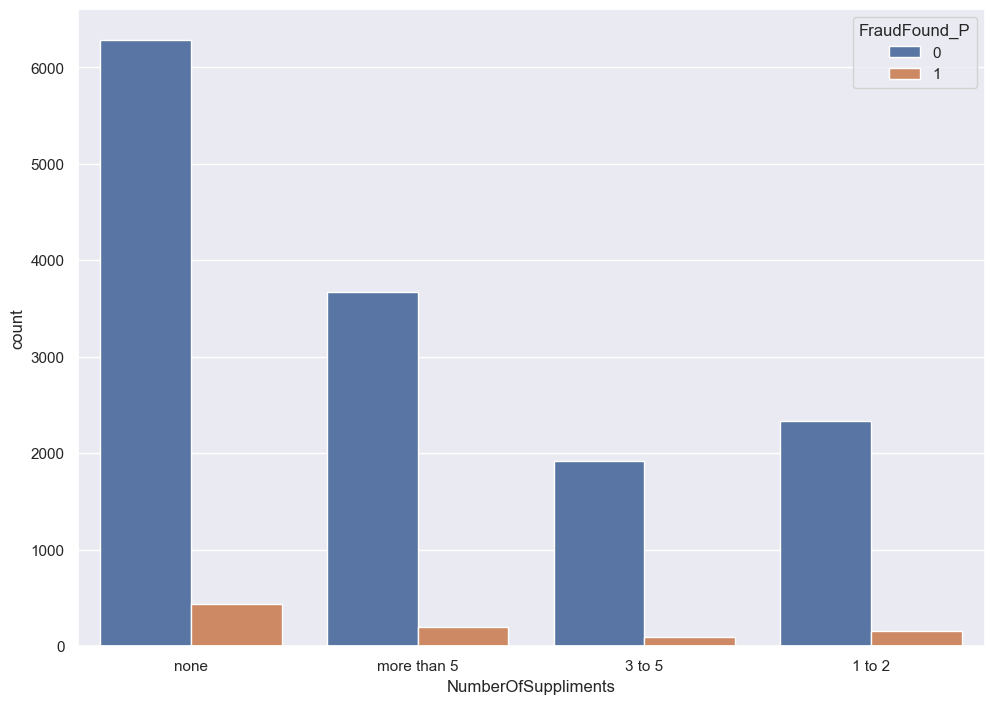

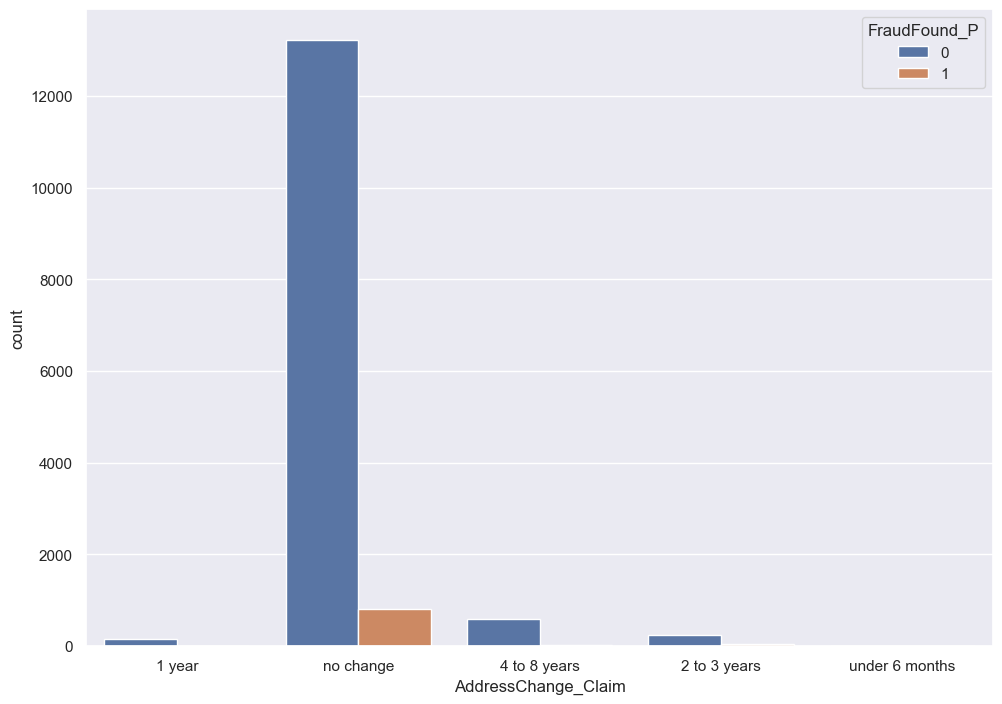

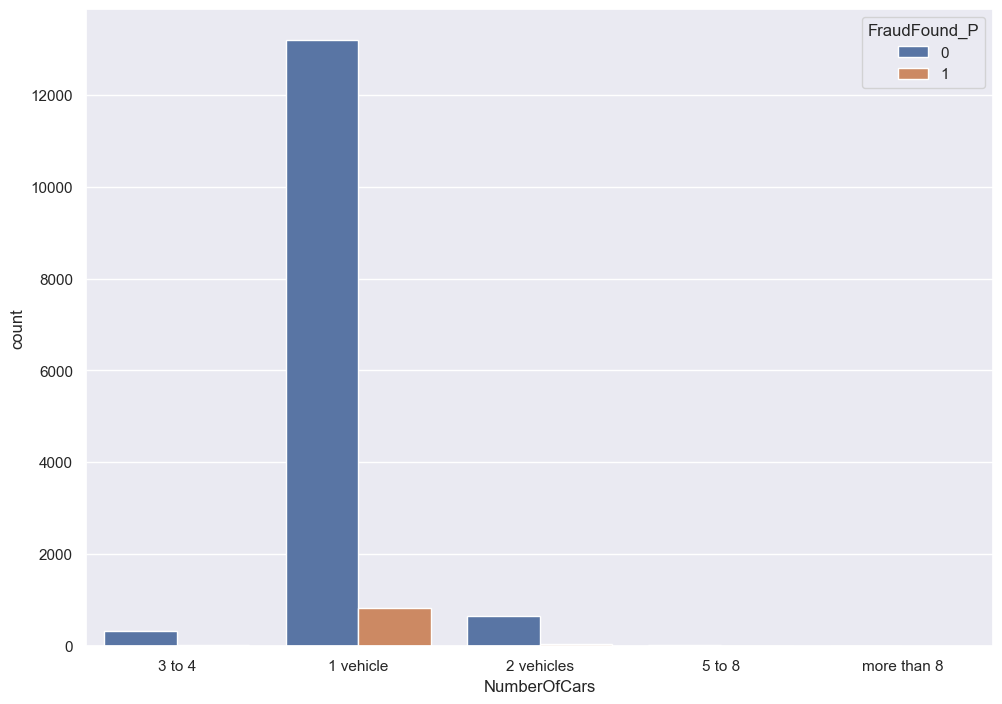

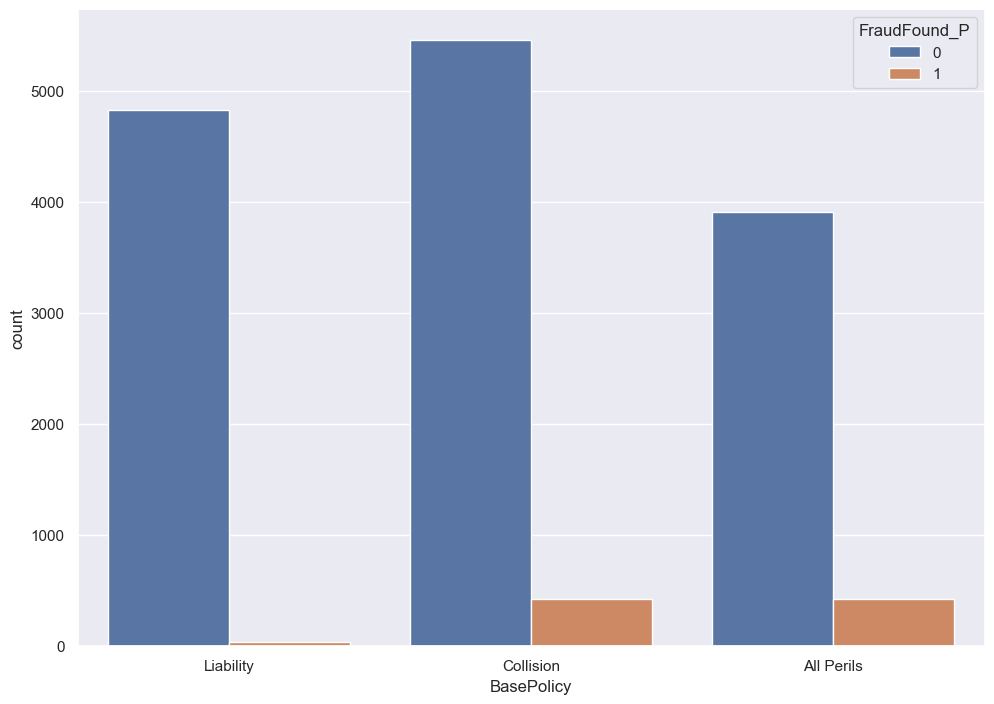

In [196]:
import matplotlib.pyplot as plt
for i in categorical:
    plt.figure()
    sns.countplot(data=fraud_data_cleaned, x=i, hue="FraudFound_P")
    

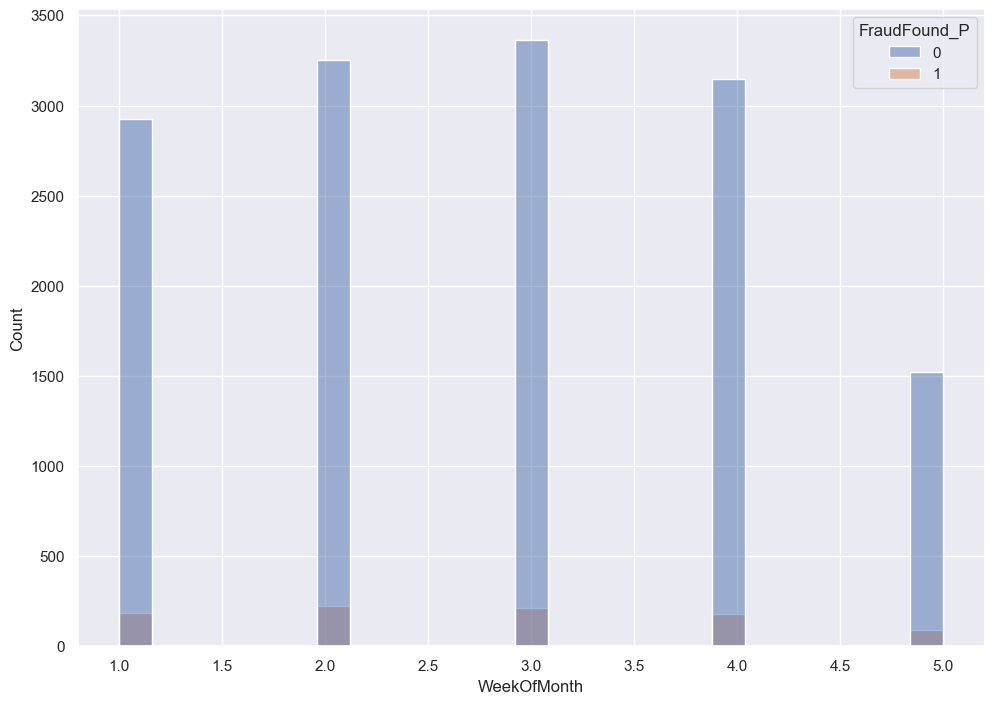

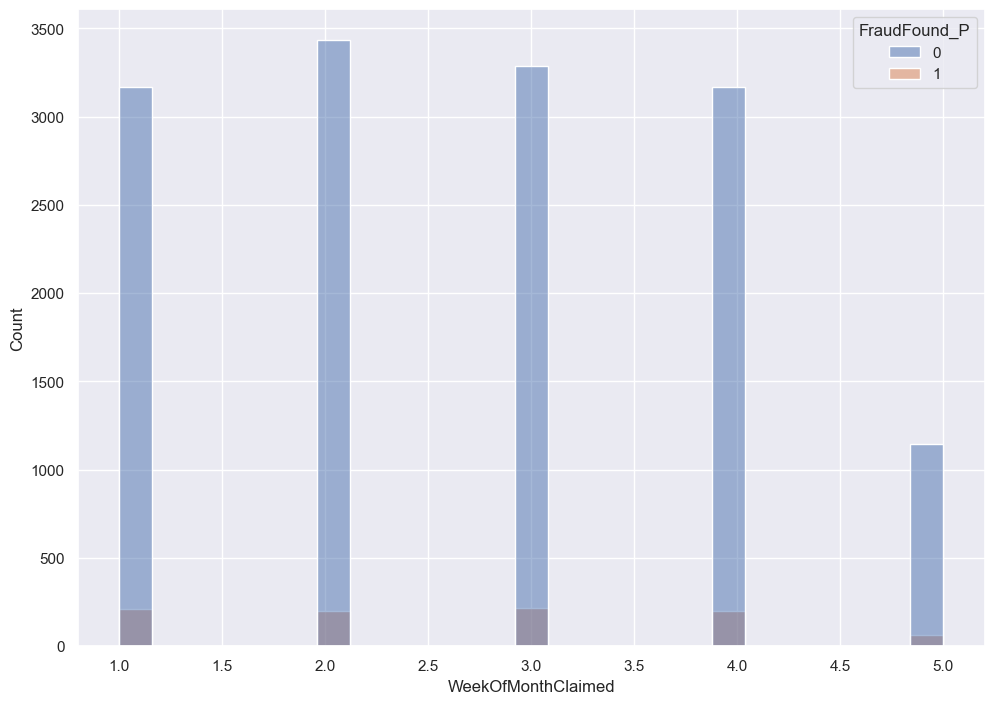

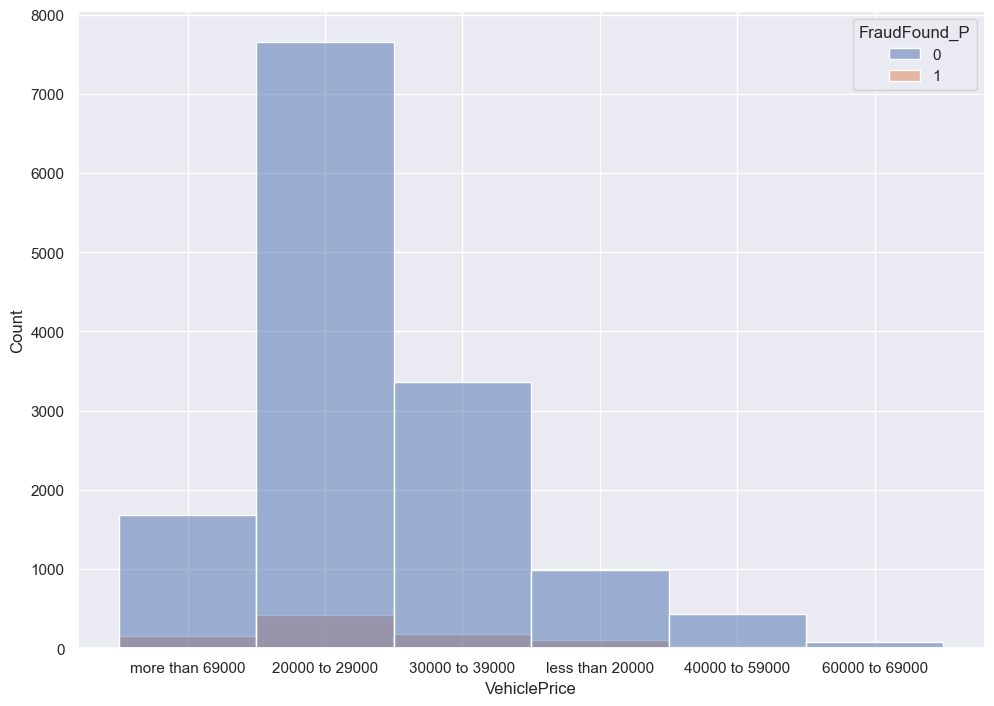

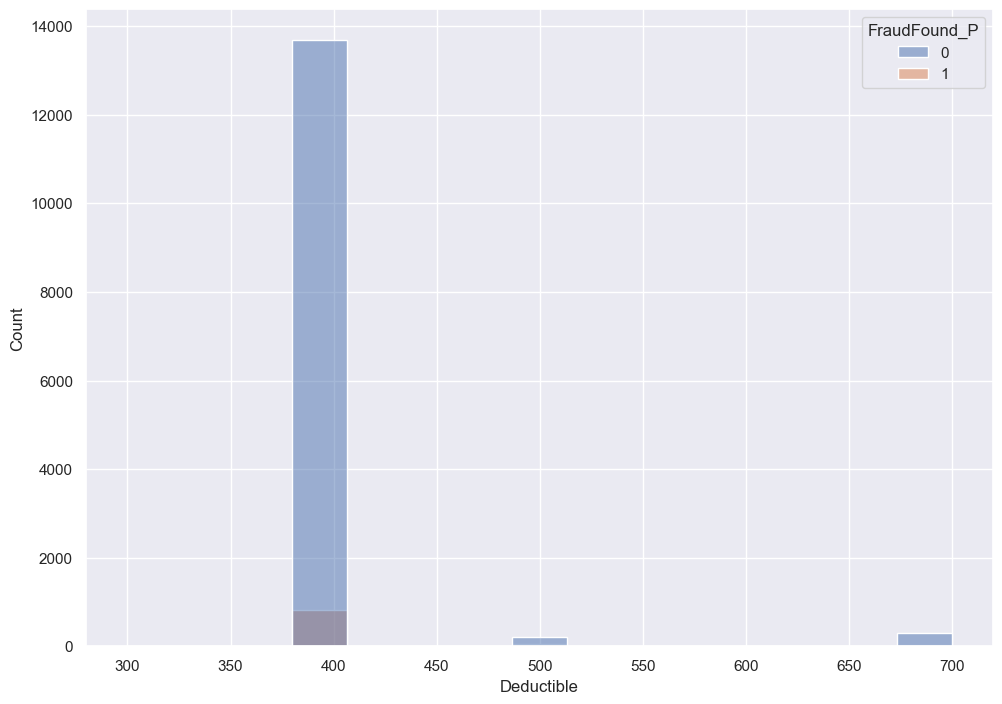

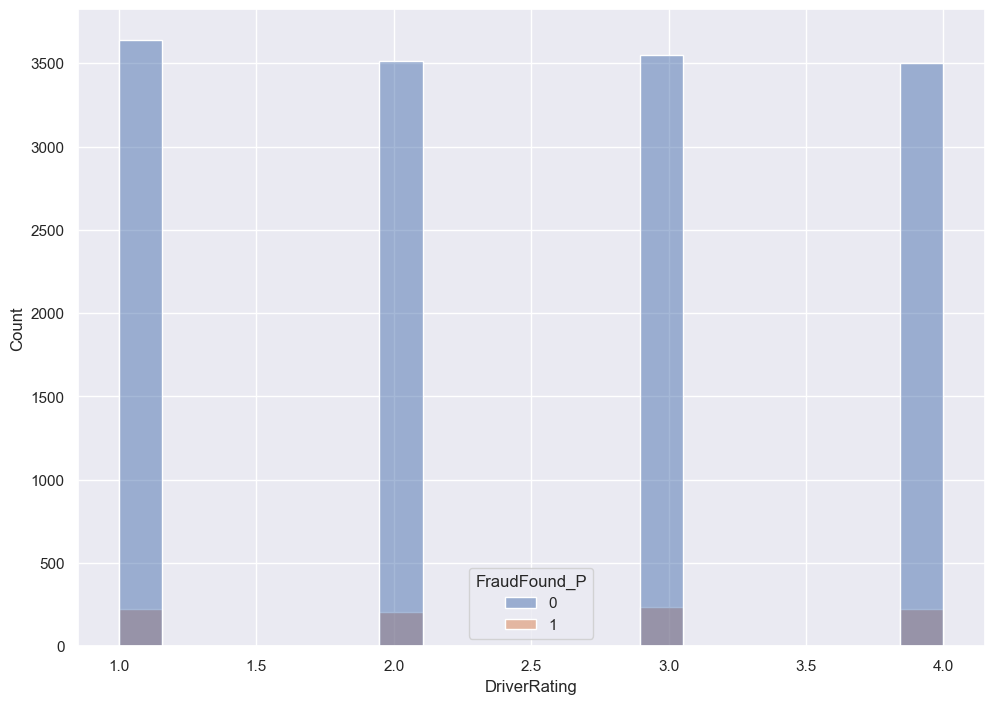

In [197]:
import matplotlib.pyplot as plt
for i in numerical:
    plt.figure()
    sns.histplot(data=fraud_data_cleaned, x=i, hue="FraudFound_P")

In [198]:
fraud_data_cleaned["BasePolicy"]

0         Liability
1         Collision
2         Collision
3         Liability
4         Collision
            ...    
15415     Collision
15416     Liability
15417     Collision
15418    All Perils
15419     Collision
Name: BasePolicy, Length: 15100, dtype: object

<Axes: xlabel='Sex', ylabel='count'>

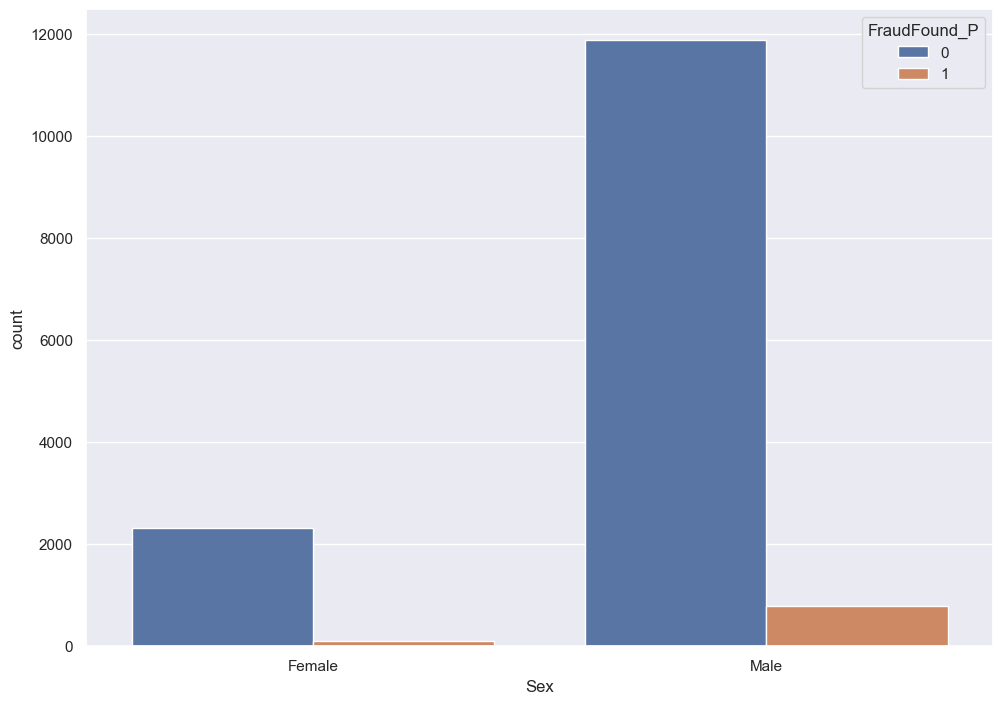

In [199]:
sns.countplot(data=fraud_data_cleaned, x="Sex", hue="FraudFound_P")

<Axes: xlabel='MaritalStatus', ylabel='count'>

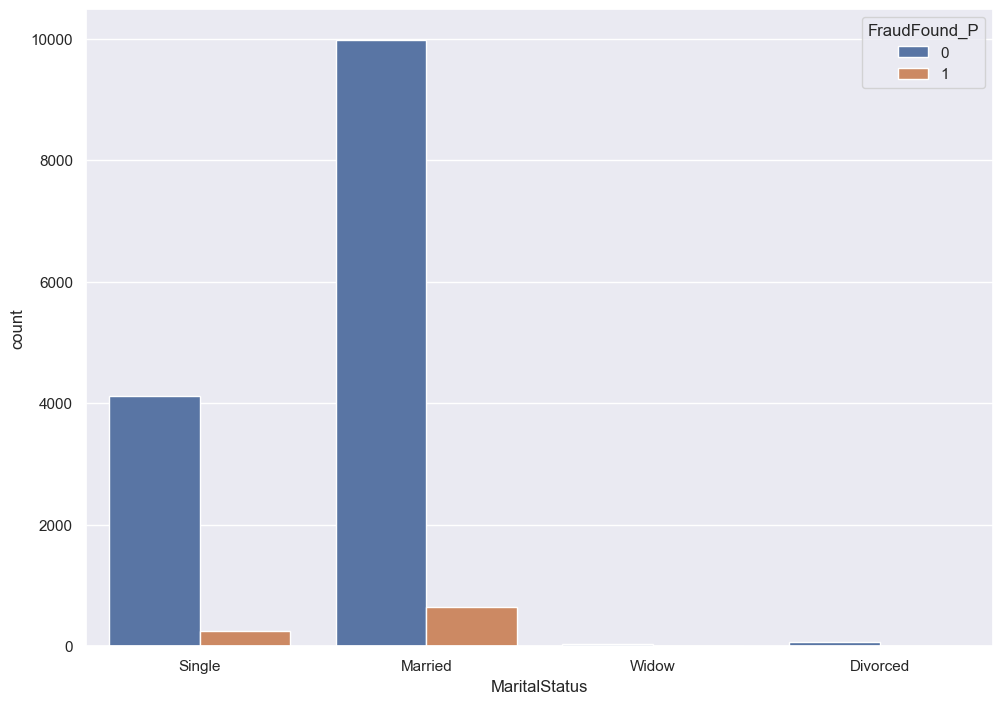

In [200]:
sns.countplot(data=fraud_data_cleaned, x="MaritalStatus", hue="FraudFound_P")

<Axes: xlabel='PastNumberOfClaims', ylabel='count'>

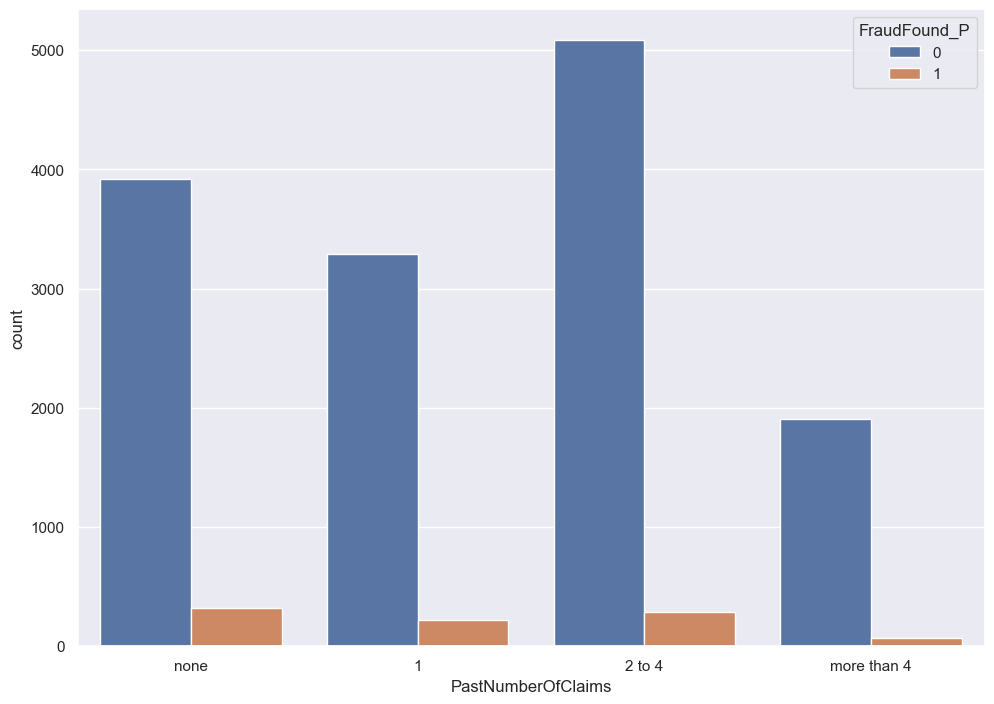

In [201]:
sns.countplot(data=fraud_data_cleaned, x="PastNumberOfClaims", hue="FraudFound_P")

<Axes: xlabel='Age', ylabel='Count'>

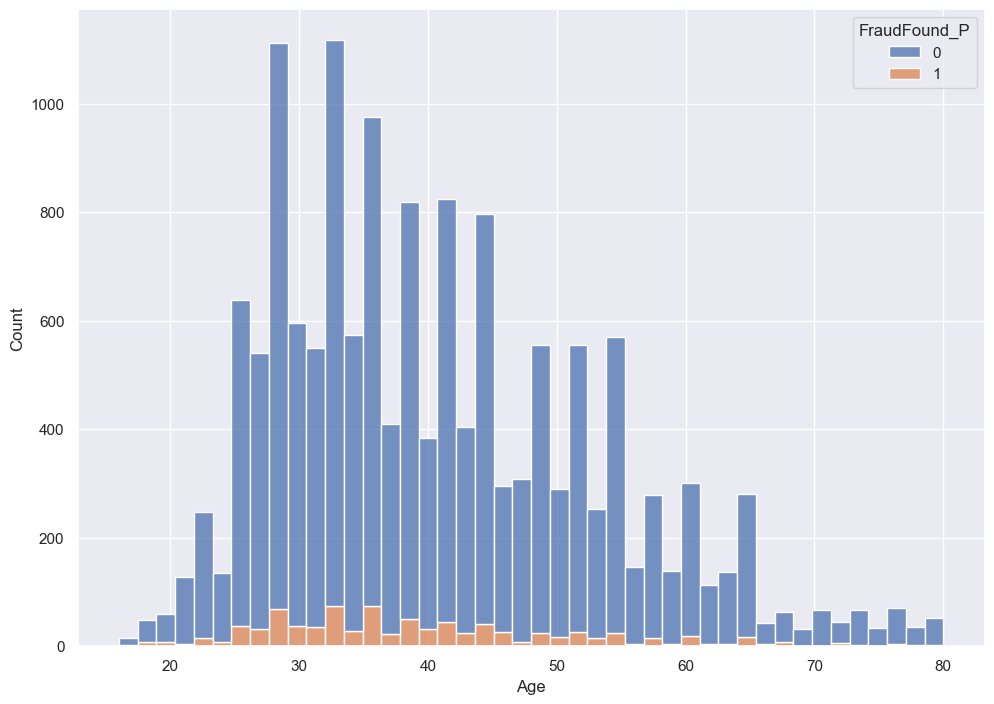

In [202]:
sns.histplot(data=fraud_data_cleaned, x="Age", hue="FraudFound_P", multiple="stack")

In [203]:
claims_per_month = fraud_data_cleaned.groupby(pd.Grouper(key='Date', axis=0, freq='M')).size()
fraud_claims_per_month = fraudulent_claims.groupby(pd.Grouper(key='Date', axis=0, freq='M')).size()

In [204]:
monthly_claims_plot = pd.DataFrame({"Num Claims per Month": claims_per_month, "Num Fraudulent Claims per Month": fraud_claims_per_month})

In [205]:
monthly_claims_plot

,Num Claims per Month,Num Fraudulent Claims per Month
Date,,
1994-01-31,574,45
1994-02-28,503,32
1994-03-31,562,50
1994-04-30,515,41
1994-05-31,551,49
1994-06-30,533,45
1994-07-31,491,30
1994-08-31,469,56
1994-09-30,439,9


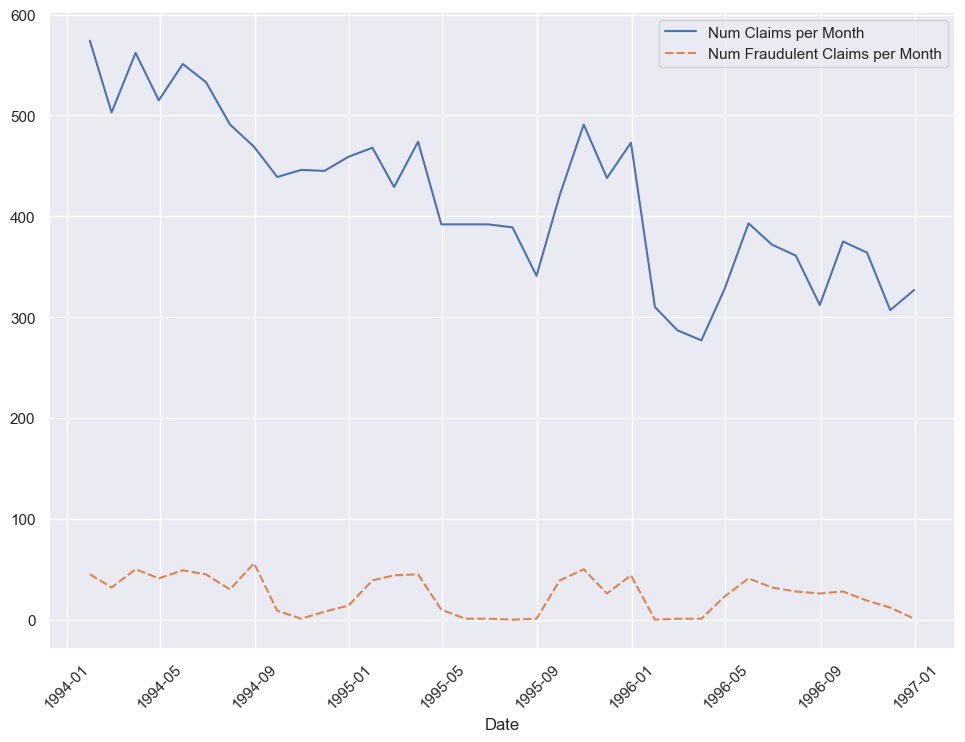

In [206]:
import matplotlib.pyplot as plt
monthly_claims = sns.lineplot(data=monthly_claims_plot)
monthly_claims.tick_params(axis='x', labelrotation=45)

<Axes: xlabel='FraudFound_P', ylabel='Age'>

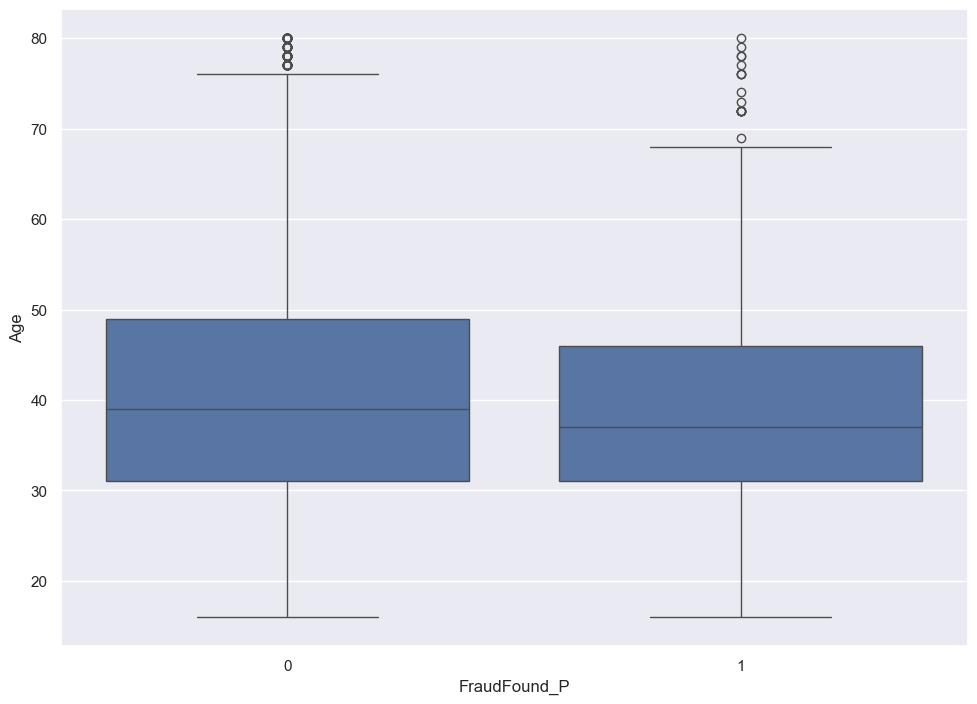

In [207]:
sns.boxplot(data=fraud_data_cleaned, x='FraudFound_P', y="Age")

<Axes: xlabel='FraudFound_P', ylabel='DriverRating'>

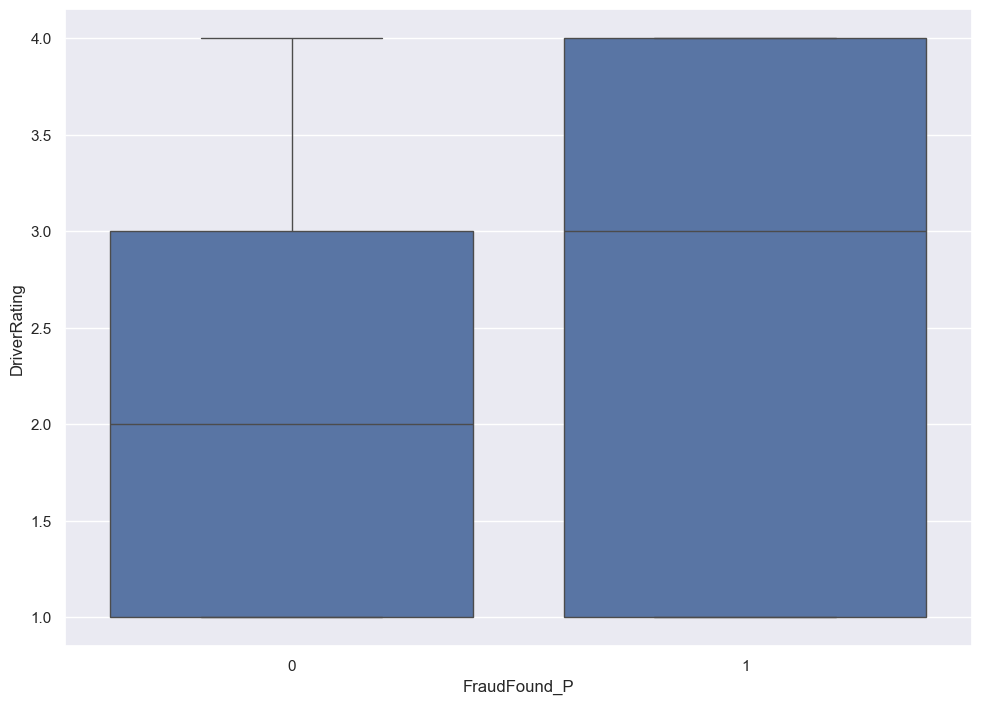

In [208]:
sns.boxplot(data=fraud_data, x='FraudFound_P', y="DriverRating")

<Axes: xlabel='DayOfWeek', ylabel='count'>

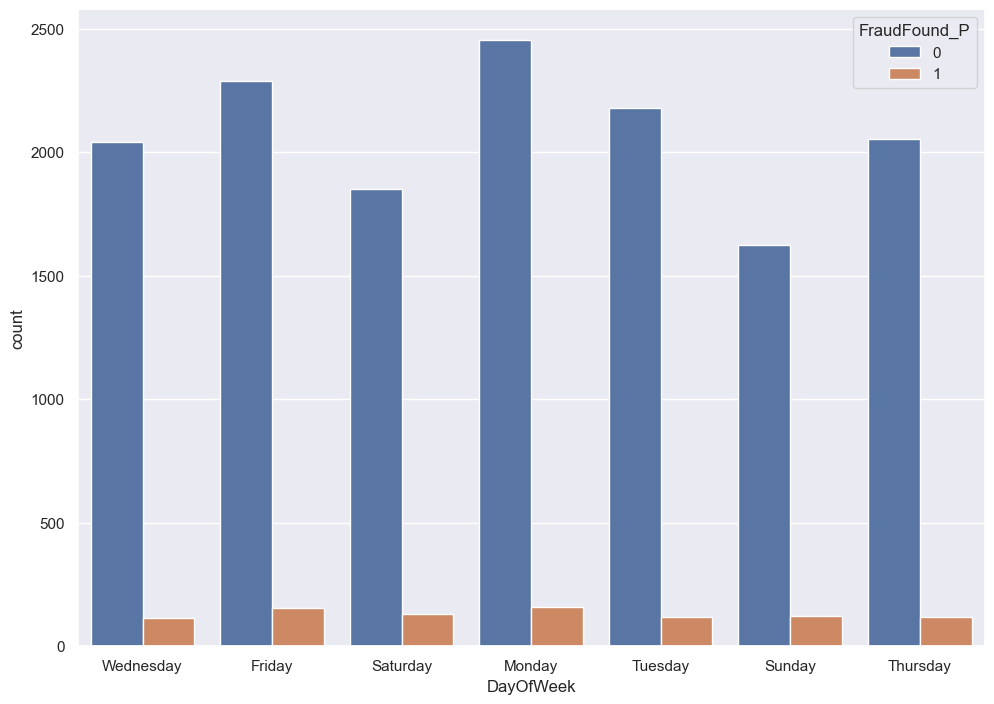

In [209]:
sns.countplot(data=fraud_data, x='DayOfWeek', hue="FraudFound_P")

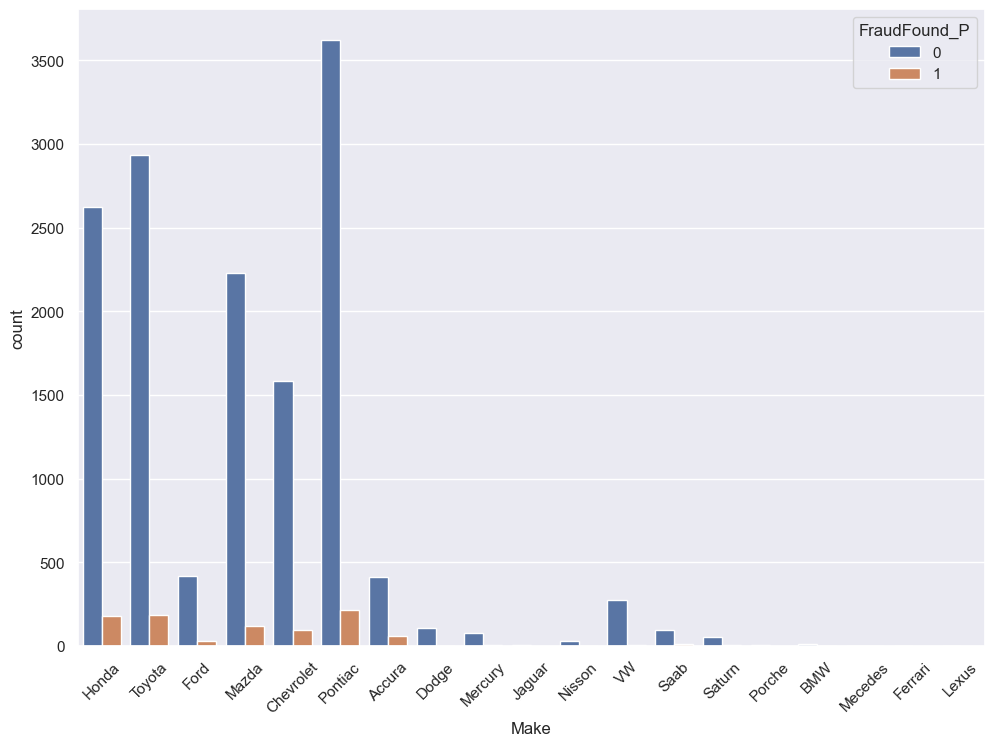

In [210]:
make_plot = sns.countplot(data=fraud_data, x='Make', hue="FraudFound_P")
make_plot.tick_params(axis='x', labelrotation=45)

In [211]:
type(fraud_data_cleaned['FraudFound_P'][0])

numpy.int64

In [212]:
fraud_data_corr = fraud_data_cleaned.corr()


ValueError: could not convert string to float: 'Dec'

In [ ]:
sns.heatmap(fraud_data_corr)

NameError: name 'fraud_data_corr' is not defined

In [ ]:
fraud_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15100 entries, 0 to 15419
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Month                 15100 non-null  object        
 1   WeekOfMonth           15100 non-null  int64         
 2   DayOfWeek             15100 non-null  object        
 3   Make                  15100 non-null  object        
 4   AccidentArea          15100 non-null  object        
 5   DayOfWeekClaimed      15100 non-null  object        
 6   MonthClaimed          15100 non-null  object        
 7   WeekOfMonthClaimed    15100 non-null  int64         
 8   Sex                   15100 non-null  object        
 9   MaritalStatus         15100 non-null  object        
 10  Age                   15100 non-null  int64         
 11  Fault                 15100 non-null  object        
 12  PolicyType            15100 non-null  object        
 13  VehicleCategory 

In [ ]:
fraud_data_cleaned_trimmed = fraud_data_cleaned.loc[:, ["WeekOfMonthClaimed", "Age", "FraudFound_P", "RepNumber", "Deductible", "DriverRating", "Year"]]

<AxesSubplot:>

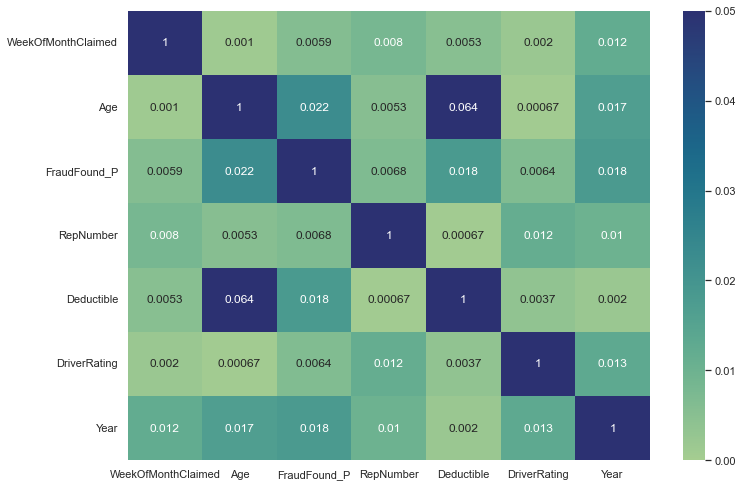

In [ ]:
sns.heatmap(np.abs(fraud_data_cleaned_trimmed.corr()), cmap="crest", annot=True, vmin=0, vmax=0.05)

# Data Cleansing/Modeling

In [213]:
# Select Modeling Features
model_data = fraud_data_cleaned.loc[:, ["MonthClaimed", "Age", "FraudFound_P", "PolicyType", "Sex", "AccidentArea", "Fault", "BasePolicy", "NumberOfCars", "AgeOfVehicle", "PoliceReportFiled", "WitnessPresent", "AgentType"]]
model_data.shape

(15100, 13)

In [214]:
model_data["FraudFound_P"].dtype

dtype('int64')

In [215]:
from sklearn.preprocessing import OneHotEncoder

# Convert categorical data to numerical data
""" model_data['MonthClaimed'] = model_data['MonthClaimed'].replace({"Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6, "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12})
model_data['PolicyType'] = model_data['PolicyType'].replace({"Sedan - Collision": 0, "Sedan - Liability": 1, "Sedan - All Perils": 2, "Utility - Collision": 3, "Utility - Liability": 4, "Utility - All Perils": 5, "Sport - Collision": 6, "Sport - Liability": 7, "Sport - All Perils": 8})
model_data['Sex'] = model_data['Sex'].replace({"Female": 0, "Male": 1})
model_data['AccidentArea'] = model_data['AccidentArea'].replace({"Rural": 0, "Urban": 1})
model_data['Fault'] = model_data['Fault'].replace({"Third Party": 0, "Policy Holder": 1})
model_data['BasePolicy'] = model_data['BasePolicy'].replace({"Collision": 0, "Liability": 1, "All Perils": 2})
model_data['NumberOfCars'] = model_data['NumberOfCars'].replace({"1 vehicle": 0, "2 vehicles": 1, "3 to 4": 2, "5 to 8": 3, "more than 8": 4})
model_data['AgeOfVehicle'] = model_data['AgeOfVehicle'].replace({"new": 0, "2 years": 1, "3 years": 2, "4 years": 3, "5 years": 4, "6 years": 5, "7 years": 6, "more than 7": 7})
model_data['PoliceReportFiled'] = model_data['PoliceReportFiled'].replace({"No": 0, "Yes": 1})
model_data['WitnessPresent'] = model_data['WitnessPresent'].replace({"No": 0, "Yes": 1})
model_data['AgentType'] = model_data['AgentType'].replace({"External": 0, "Internal": 1}) """

categorical_columns = model_data.select_dtypes(include=['object']).columns.tolist()

encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(model_data[categorical_columns])

one_hot_model_data = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

model_data_encoded = pd.concat([model_data, one_hot_model_data], axis=1)

model_data_encoded = model_data_encoded.drop(categorical_columns, axis=1)
model_data_encoded = model_data_encoded.dropna()

model_data_encoded

,Age,FraudFound_P,MonthClaimed_Apr,MonthClaimed_Aug,MonthClaimed_Dec,MonthClaimed_Feb,MonthClaimed_Jan,MonthClaimed_Jul,MonthClaimed_Jun,MonthClaimed_Mar,...,AgeOfVehicle_6 years,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new,PoliceReportFiled_No,PoliceReportFiled_Yes,WitnessPresent_No,WitnessPresent_Yes,AgentType_External,AgentType_Internal
0,21.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,34.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,65.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,27.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
15096,65.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
15097,45.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
15098,50.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [227]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_recall_curve
X = model_data_encoded. loc[:, model_data_encoded.columns != "FraudFound_P"].values
y = model_data_encoded["FraudFound_P"].values
#Split data into test data and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [ ]:
y_train

array([0., 0., 0., ..., 0., 0., 1.])

In [224]:
model = LogisticRegression(max_iter=600) 
model.fit(X_train, y_train)

LogisticRegression(max_iter=600)

In [222]:
type(model)

sklearn.linear_model._logistic.LogisticRegression

In [ ]:
categorical = [
"MonthClaimed",
"Fault",
"PolicyType",
"VehicleCategory",
#"VehiclePrice",
"Days_Policy_Accident",
"Days_Policy_Claim",
"AgeOfVehicle",
"AgeOfPolicyHolder",
"PoliceReportFiled",
"WitnessPresent",
"AgentType",
"NumberOfSuppliments",
"AddressChange_Claim",
"NumberOfCars",
"BasePolicy"]

numerical = ["WeekOfMonth",
"WeekOfMonthClaimed",
"VehiclePrice",
"Deductible",
"DriverRating"]

# Evaluation

In [225]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred_proba

array([0.05200435, 0.0606724 , 0.06893338, ..., 0.05674634, 0.06692012,
       0.05593132])

In [ ]:
#y_pred_proba.index(max(y_pred_proba))

AttributeError: 'numpy.ndarray' object has no attribute 'index'

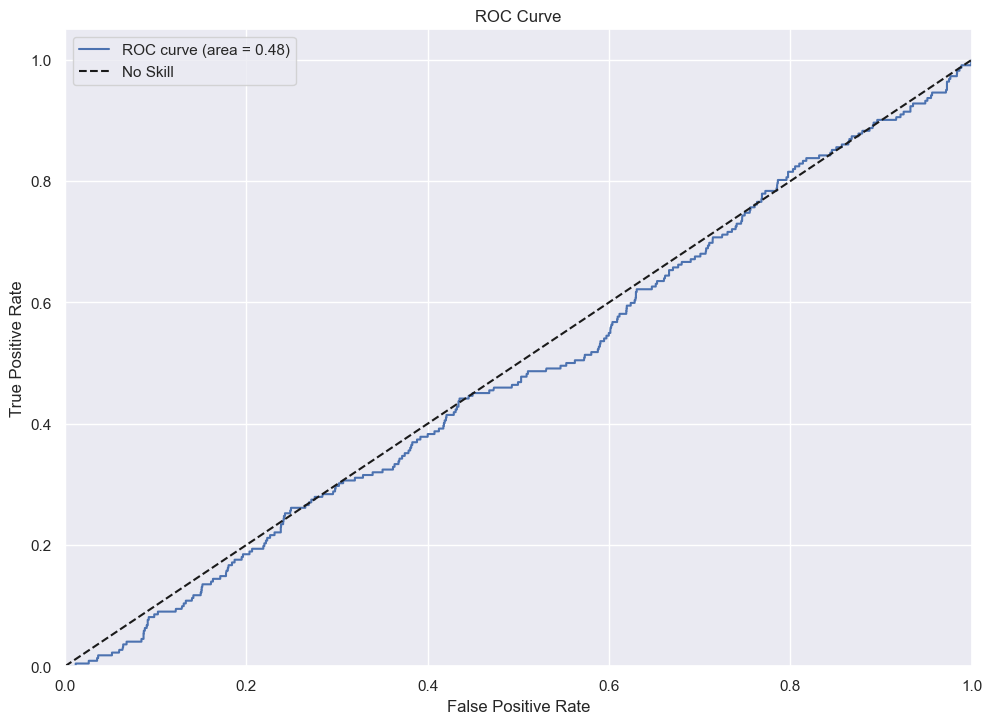

In [226]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) 
roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

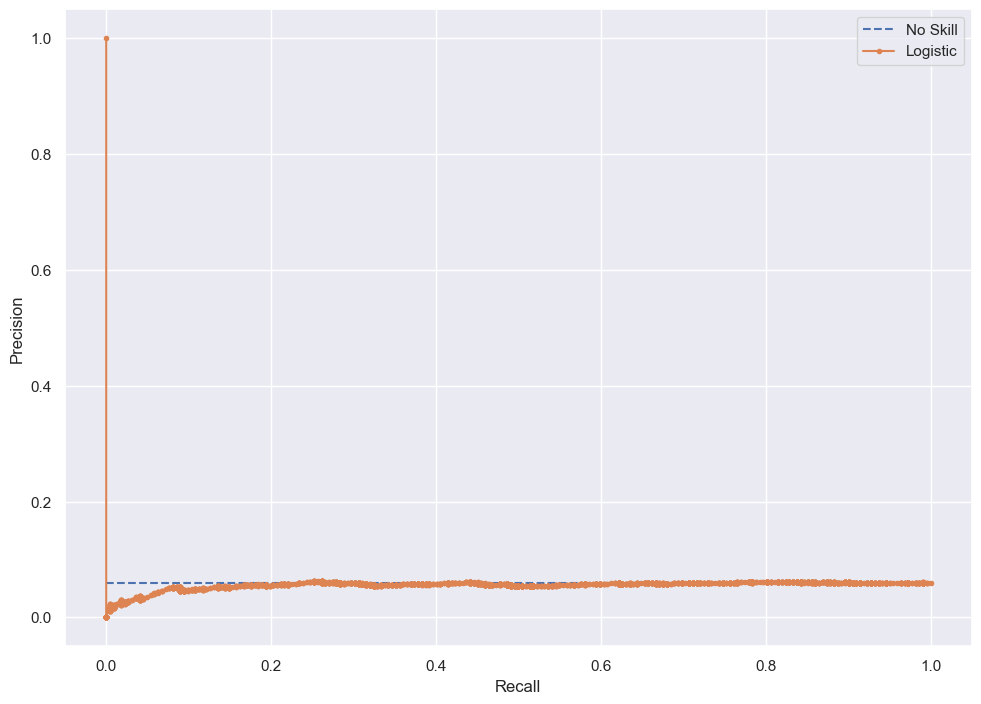

In [228]:
# calculate the no skill line as the proportion of the positive class
no_skill = len(y[y==1]) / len(y)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()